<a href="https://colab.research.google.com/github/SkaiLord/ML-Lab/blob/main/ML_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 7 - Gradient Descent for Simple Linear Regression


Intercept: 4.1749209693215706e-10 , Slope: 0.6757341087572708 


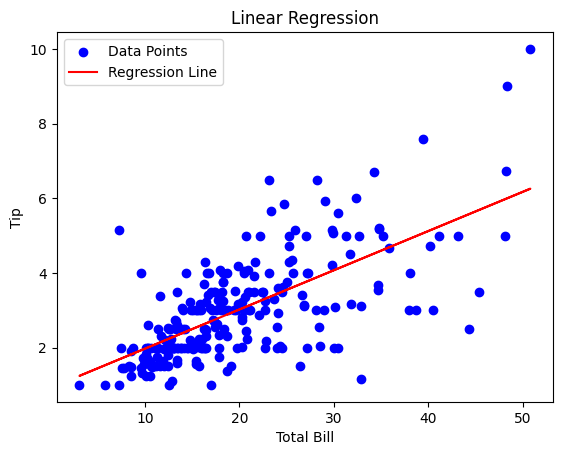

In [ ]:
# Gradient Descent for simple linear regression

import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
tips = sb.load_dataset("tips")

# Extract features
x = tips['total_bill'].values
y = tips['tip'].values

# Reshape X to be 2d array
x = x.reshape(-1, 1)

# Standardize data
x_mean = np.mean(x)
x_std = np.std(x)
y_mean = np.mean(y)
y_std = np.std(y)

x = (x - x_mean) / x_std
y = (y - y_mean) / y_std

# Add bias term (cols of 1's) to x
x_b = np.c_[np.ones((x.shape[0],1)), x]

# Initialize parameters
theta = np.random.rand(2,1)

# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000
m = len(y)

# Reshape y to be 2D
y = y.reshape(-1, 1)

# Gradient Descent
for iteration in range(n_iterations):
  gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
  theta = theta - learning_rate * gradients

# Extract parameters for training
intercept = theta[0][0]
slope = theta[1][0]

# Print results
print(f"Intercept: {intercept} , Slope: {slope} ")

# Plotting results
plt.scatter(tips['total_bill'], tips['tip'], color='blue', label='Data Points')

# Generate predictions using the optimized parameters
predictions = x_b.dot(theta)

# Unstandardize data to plot in original units
x = (x * x_std) + x_mean
y = (y * y_std) + y_mean
predictions = (predictions * y_std) + y_mean

# Plot the regression line
plt.plot(x, predictions, color='red', label='Regression Line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression')
plt.legend()
plt.show()